Enter the year for population data between(1960-2023)(e.g., '2019'): 2001
Enter the number of top countries to display: 20


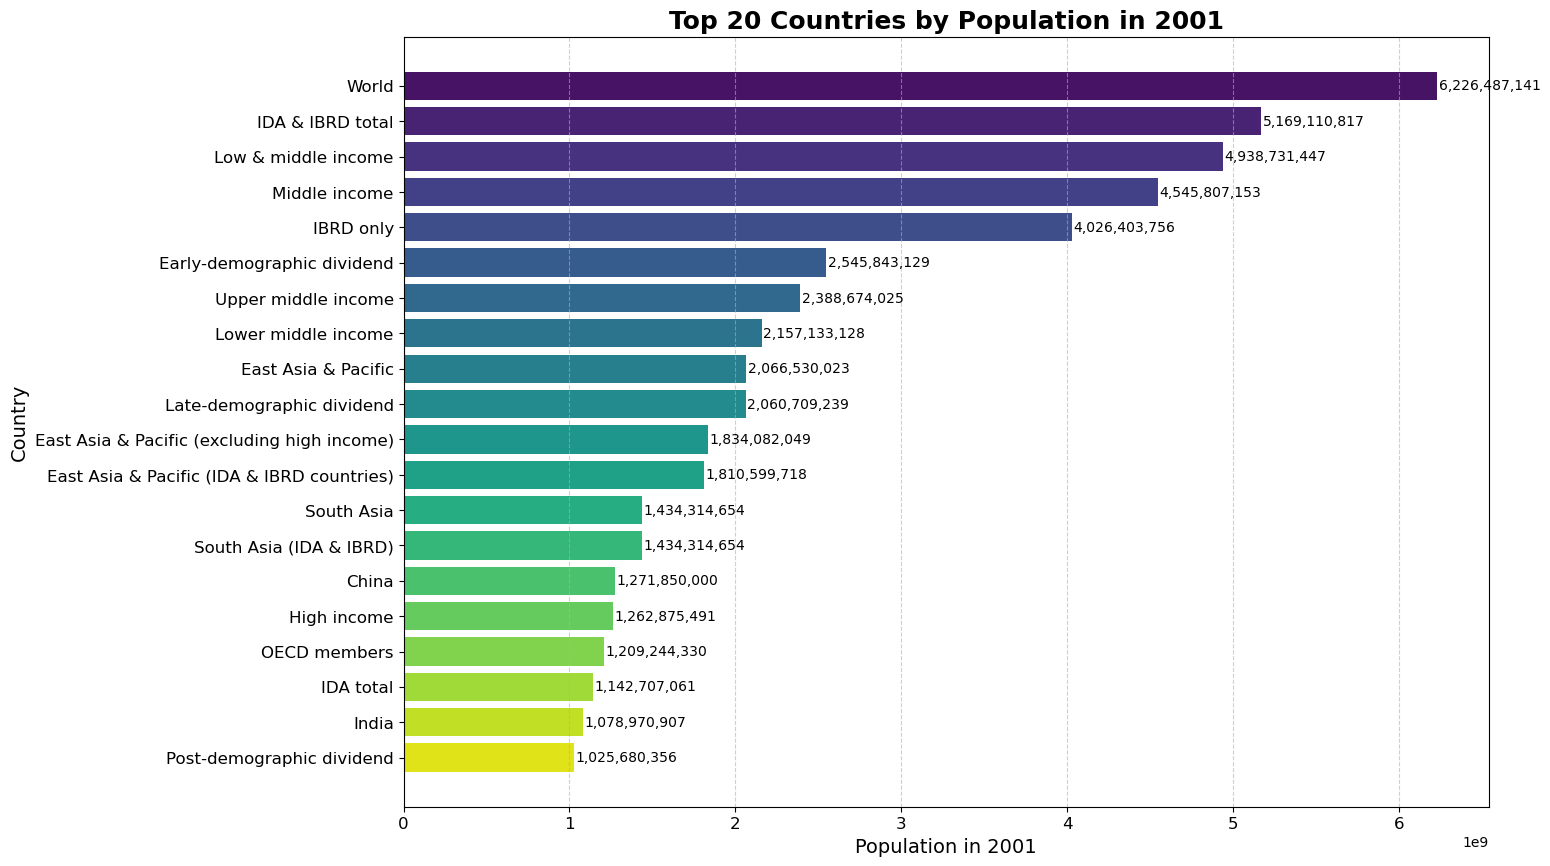

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3120860.csv')

# drop unnessery column
# df.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 68'],inplace=True)

# Ask the user for the year and number of top countries to display
year = input("Enter the year for population data between(1960-2023)(e.g., '2019'): ")
num_top_countries = int(input("Enter the number of top countries to display: "))

# Filter relevant columns
data_filtered = data[['Country Name', year]].dropna()

# Sort data by population for better visualization
data_filtered = data_filtered.sort_values(by=year, ascending=False).head(num_top_countries)

# Set up the figure
plt.figure(figsize=(14, 10))

# Use a Seaborn color palette
colors = sns.color_palette("viridis", len(data_filtered))

# Create the bar chart
bars = plt.barh(data_filtered['Country Name'], data_filtered[year], color=colors)

# Add labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 1e7, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             va='center', ha='left', fontsize=10, color='black')

# Set labels and title with custom font sizes
plt.xlabel(f'Population in {year}', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title(f'Top {num_top_countries} Countries by Population in {year}', fontsize=18, weight='bold')

# Customize the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Invert y-axis to have the largest values on top
plt.gca().invert_yaxis()

# Show the plot
plt.show()
